# Template of a SMI jupyter notebook

In [1]:
# These packages should all be installed if the procedure was followed
%pylab nbagg

import matplotlib.pyplot as plt

from smi_analysis import SMI_beamline
import numpy as np
import fabio
import os



import sys, os
SciAnalysis_PATH='/home/yuzhang/Repos/SciAnalysis/'
SciAnalysis_PATH in sys.path or sys.path.append(SciAnalysis_PATH)
from SciAnalysis.IO_HDF import dicttoh5, h5todict


Populating the interactive namespace from numpy and matplotlib


In [2]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Stitch_Scattering.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/IO.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/saxs.py



## Experimental configuration

In [3]:
geometry = 'Transmission'
energy = 16.1
wav = 1E-10 * (12.398/energy)
bs_kind = None
det_ini_angle = np.deg2rad(0)
det_angle_step = np.deg2rad(6.5)
incident_angle = np.deg2rad(0)


detector_waxs = 'Pilatus300kw'
sdd_waxs = 273.9
center_waxs = [97., 1386]
bs_pos_waxs = [[97, 1250]]


SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                     detector = detector_waxs,
                                     sdd = sdd_waxs,
                                     wav = wav,
                                     alphai = incident_angle,
                                     center = center_waxs,
                                     bs_pos = bs_pos_waxs,
                                     det_ini_angle = det_ini_angle,
                                     det_angle_step = det_angle_step,
                                     bs_kind = bs_kind)

## Locate the files on your computer

In [4]:
scat = 'WAXS'
det = '300KW'

username = 'Dinca' 

inDir = '/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/raw_data/%s/'%det
outDir0 = '/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/'  
outDir0 = create_fullpath(  outDir0 )


Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/  already exists


In [5]:
flag_save = True 
outDir1 = create_dir(  '%s/%s/'%(username,scat), outDir0 )
outDir = create_dir(  'Results/', outDir1 )
create_dir( '%s/%s/Results/TIFF/'%(username,scat), outDir0  )
outDir_HDF =  create_dir(  '%s/HDF_Results/'%(username), outDir0 )

print( outDir )
print( outDir_HDF)


Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/WAXS/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/WAXS/Results/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/WAXS/Results/TIFF/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/HDF_Results/  already exists
/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/WAXS/Results/
/home/group/NSLSII_Data/SMI/2020_Cycle2/304231_Dinca/Analysis_Results/Dinca/HDF_Results/


In [6]:
t_list = ls_dir( inDir, and_list=[ username ])

In [7]:
t_list

array(['Dinca_S7_CuHHTT_CsBr_Pos_x-5750.95_y-4849.88_degwaxs58.50_1s_None_att_115246_sid_000001_WAXS.tif',
       'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs19.50_1s_None_att_115196_sid_000001_WAXS.tif',
       'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs19.50_1s_None_att_115273_sid_000001_WAXS.tif',
       'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.56_y-5149.93_degwaxs06.50_1s_None_att_115183_sid_000001_WAXS.tif',
       'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.82_y-4999.92_degwaxs00.00_1s_None_att_115226_sid_000001_WAXS.tif',
       'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.85_y-4799.83_degwaxs58.50_1s_None_att_115257_sid_000001_WAXS.tif',
       'Dinca_S11_NiBHT_Bare_x19698.26_y-4600.07_degwaxs00.00_1s_None_att_115281_sid_000001_WAXS.tif',
       'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.02_y-5098.94_degwaxs00.00_1s_None_att_115204_sid_000001_WAXS.tif',
       'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs52.00_1s_None_att_115278_sid_000001_WAXS.tif',
       'Dinca_S9_CuHHTT_

In [8]:
sam_dict, sams = get_Unique_SamDict_from_list( t_list, cut_pattern= r'[_][x]', starting_point=0,     )   
ks =  sorted(list(sams.keys()))


In [9]:
sams

{'Dinca_S7_CuHHTT_CsBr_Pos': 11,
 'Dinca_S3_CuHHTT_KNO2_Soaked': 11,
 'Dinca_S10_CuHHTT_CsBr_Neg': 11,
 'Dinca_S2_CuHHTT_TEPBF4_Soaked': 11,
 'Dinca_S6_CuHHTT_KNO2_Pos': 11,
 'Dinca_S8_CuHHTT_TEPBF4_Neg': 11,
 'Dinca_S11_NiBHT_Bare': 11,
 'Dinca_S4_CuHHTT_CsBr_Soaked': 11,
 'Dinca_S9_CuHHTT_KNO2_Neg': 11,
 'Dinca_S1_CuHHTT_Bare': 11,
 'Dinca_S5_CuHHTT_TEPBF4_Pos': 11}

In [10]:
ks

['Dinca_S10_CuHHTT_CsBr_Neg',
 'Dinca_S11_NiBHT_Bare',
 'Dinca_S1_CuHHTT_Bare',
 'Dinca_S2_CuHHTT_TEPBF4_Soaked',
 'Dinca_S3_CuHHTT_KNO2_Soaked',
 'Dinca_S4_CuHHTT_CsBr_Soaked',
 'Dinca_S5_CuHHTT_TEPBF4_Pos',
 'Dinca_S6_CuHHTT_KNO2_Pos',
 'Dinca_S7_CuHHTT_CsBr_Pos',
 'Dinca_S8_CuHHTT_TEPBF4_Neg',
 'Dinca_S9_CuHHTT_KNO2_Neg']

In [11]:
ki = 0 
sam = ks[ki]
print( 'The sample is: %s.'%sam)
flist = sam_dict[ sam ]
print(flist)

The sample is: Dinca_S10_CuHHTT_CsBr_Neg.
['Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs19.50_1s_None_att_115273_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs52.00_1s_None_att_115278_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.48_y-4599.95_degwaxs45.50_1s_None_att_115277_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.94_degwaxs65.00_1s_None_att_115280_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.95_degwaxs26.00_1s_None_att_115274_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.96_degwaxs13.00_1s_None_att_115272_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs06.50_1s_None_att_115271_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs32.50_1s_None_att_115275_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs39.00_1s_None_att_115276_sid_000001_WAXS.tif', 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_d

In [12]:
sflistd = sort_fnlist( flist, pattern='115', lsid = 6 , method='contain' )
sflist = np.array( list(sflistd.values()) )
print('The filename list for this sam=%s are:\n %s.'%(sam, sflist ))

The filename list for this sam=Dinca_S10_CuHHTT_CsBr_Neg are:
 ['Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.96_degwaxs00.00_1s_None_att_115270_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs06.50_1s_None_att_115271_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.96_degwaxs13.00_1s_None_att_115272_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs19.50_1s_None_att_115273_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.95_degwaxs26.00_1s_None_att_115274_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs32.50_1s_None_att_115275_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs39.00_1s_None_att_115276_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.48_y-4599.95_degwaxs45.50_1s_None_att_115277_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs52.00_1s_None_att_115278_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_

## Sort our the filenames

In [13]:
ssam_dict = {}
for sam in ks:     
    print( 'The sample is: %s.'%sam)
    flist = sam_dict[ sam ]
    sflistd = sort_fnlist( flist, pattern='115', lsid = 6 , method='contain' )
    sflist = np.array( list(sflistd.values()) )
    print('The filename list for this sam=%s are:\n %s.'%(sam, sflist ))
    ssam_dict[ sam ] = sflist

The sample is: Dinca_S10_CuHHTT_CsBr_Neg.
The filename list for this sam=Dinca_S10_CuHHTT_CsBr_Neg are:
 ['Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.96_degwaxs00.00_1s_None_att_115270_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs06.50_1s_None_att_115271_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.96_degwaxs13.00_1s_None_att_115272_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs19.50_1s_None_att_115273_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.95_degwaxs26.00_1s_None_att_115274_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs32.50_1s_None_att_115275_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs39.00_1s_None_att_115276_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.48_y-4599.95_degwaxs45.50_1s_None_att_115277_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs52.00_1s_None_att_115278_sid_000

In [14]:
ks

['Dinca_S10_CuHHTT_CsBr_Neg',
 'Dinca_S11_NiBHT_Bare',
 'Dinca_S1_CuHHTT_Bare',
 'Dinca_S2_CuHHTT_TEPBF4_Soaked',
 'Dinca_S3_CuHHTT_KNO2_Soaked',
 'Dinca_S4_CuHHTT_CsBr_Soaked',
 'Dinca_S5_CuHHTT_TEPBF4_Pos',
 'Dinca_S6_CuHHTT_KNO2_Pos',
 'Dinca_S7_CuHHTT_CsBr_Pos',
 'Dinca_S8_CuHHTT_TEPBF4_Neg',
 'Dinca_S9_CuHHTT_KNO2_Neg']

In [15]:
ks[2:3]

['Dinca_S1_CuHHTT_Bare']

## Do circular average

In [16]:
show_raw = True #False
make_cake = False
flag_save = True #False

In [17]:
%matplotlib inline

The sample is: Dinca_S10_CuHHTT_CsBr_Neg.
The filename list for this sam=Dinca_S10_CuHHTT_CsBr_Neg are:
 ['Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.96_degwaxs00.00_1s_None_att_115270_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs06.50_1s_None_att_115271_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.96_degwaxs13.00_1s_None_att_115272_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs19.50_1s_None_att_115273_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.95_degwaxs26.00_1s_None_att_115274_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.46_y-4599.96_degwaxs32.50_1s_None_att_115275_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs39.00_1s_None_att_115276_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.48_y-4599.95_degwaxs45.50_1s_None_att_115277_sid_000001_WAXS.tif'
 'Dinca_S10_CuHHTT_CsBr_Neg_x13398.47_y-4599.95_degwaxs52.00_1s_None_att_115278_sid_000

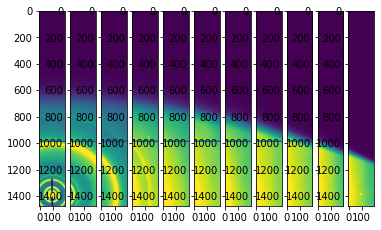

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

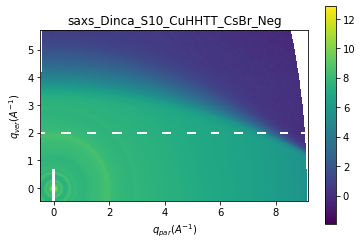

<Figure size 432x288 with 0 Axes>

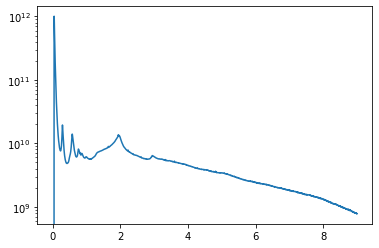

The sample is: Dinca_S11_NiBHT_Bare.
The filename list for this sam=Dinca_S11_NiBHT_Bare are:
 ['Dinca_S11_NiBHT_Bare_x19698.26_y-4600.07_degwaxs00.00_1s_None_att_115281_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.26_y-4600.07_degwaxs06.50_1s_None_att_115282_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.27_y-4600.07_degwaxs13.00_1s_None_att_115283_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.26_y-4600.08_degwaxs19.50_1s_None_att_115284_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.26_y-4600.07_degwaxs26.00_1s_None_att_115285_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.26_y-4600.07_degwaxs32.50_1s_None_att_115286_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.27_y-4600.07_degwaxs39.00_1s_None_att_115287_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.26_y-4600.08_degwaxs45.50_1s_None_att_115288_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.26_y-4600.07_degwaxs52.00_1s_None_att_115289_sid_000001_WAXS.tif'
 'Dinca_S11_NiBHT_Bare_x19698.27_y-4600.0

<Figure size 432x288 with 0 Axes>

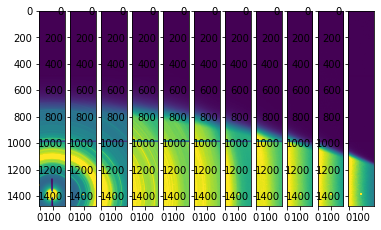

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

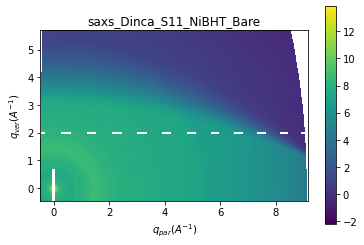

<Figure size 432x288 with 0 Axes>

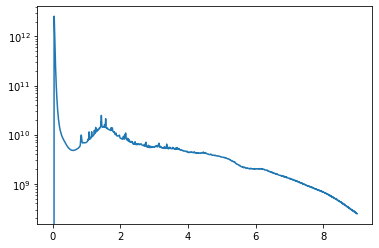

The sample is: Dinca_S1_CuHHTT_Bare.
The filename list for this sam=Dinca_S1_CuHHTT_Bare are:
 ['Dinca_S1_CuHHTT_Bare_x45148.07_y-4299.9_degwaxs00.00_1s_None_att_115292_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.07_y-4299.89_degwaxs06.50_1s_None_att_115293_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.07_y-4299.89_degwaxs13.00_1s_None_att_115294_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.08_y-4299.89_degwaxs19.50_1s_None_att_115295_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.07_y-4299.88_degwaxs26.00_1s_None_att_115296_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.06_y-4299.88_degwaxs32.50_1s_None_att_115297_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.08_y-4299.89_degwaxs39.00_1s_None_att_115298_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.07_y-4299.88_degwaxs45.50_1s_None_att_115299_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.07_y-4299.88_degwaxs52.00_1s_None_att_115300_sid_000001_WAXS.tif'
 'Dinca_S1_CuHHTT_Bare_x45148.08_y-4299.88

<Figure size 432x288 with 0 Axes>

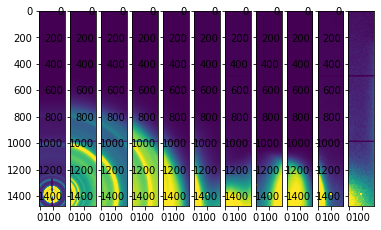

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

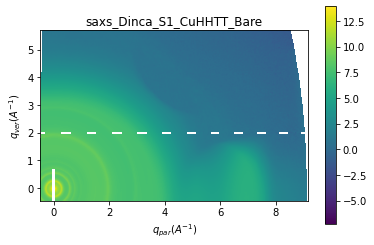

<Figure size 432x288 with 0 Axes>

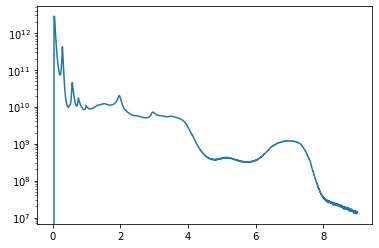

The sample is: Dinca_S2_CuHHTT_TEPBF4_Soaked.
The filename list for this sam=Dinca_S2_CuHHTT_TEPBF4_Soaked are:
 ['Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.54_y-5149.93_degwaxs00.00_1s_None_att_115182_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.56_y-5149.93_degwaxs06.50_1s_None_att_115183_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.56_y-5149.92_degwaxs13.00_1s_None_att_115184_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.55_y-5149.92_degwaxs19.50_1s_None_att_115185_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.54_y-5149.93_degwaxs26.00_1s_None_att_115186_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.54_y-5149.93_degwaxs32.50_1s_None_att_115187_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.54_y-5149.92_degwaxs39.00_1s_None_att_115188_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551.55_y-5149.92_degwaxs45.50_1s_None_att_115189_sid_000001_WAXS.tif'
 'Dinca_S2_CuHHTT_TEPBF4_Soaked_x-37551

<Figure size 432x288 with 0 Axes>

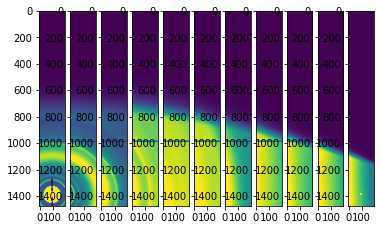

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

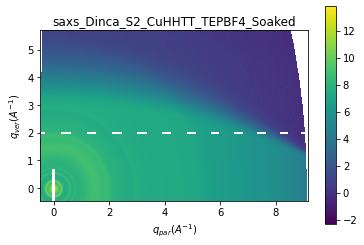

<Figure size 432x288 with 0 Axes>

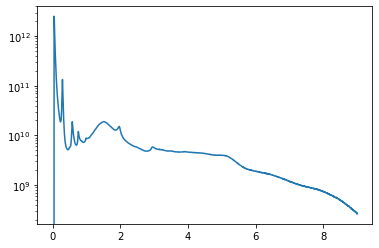

The sample is: Dinca_S3_CuHHTT_KNO2_Soaked.
The filename list for this sam=Dinca_S3_CuHHTT_KNO2_Soaked are:
 ['Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs00.00_1s_None_att_115193_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs06.50_1s_None_att_115194_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs13.00_1s_None_att_115195_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs19.50_1s_None_att_115196_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs26.00_1s_None_att_115197_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs32.50_1s_None_att_115198_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs39.00_1s_None_att_115199_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.86_y-5298.88_degwaxs45.50_1s_None_att_115200_sid_000001_WAXS.tif'
 'Dinca_S3_CuHHTT_KNO2_Soaked_x-31200.84_y-5298.88_degwaxs5

<Figure size 432x288 with 0 Axes>

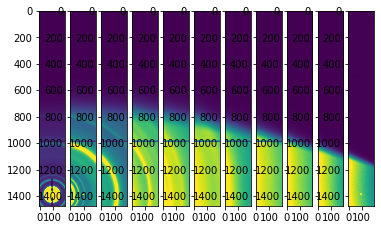

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

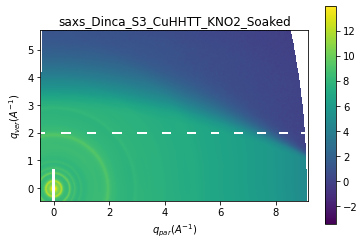

<Figure size 432x288 with 0 Axes>

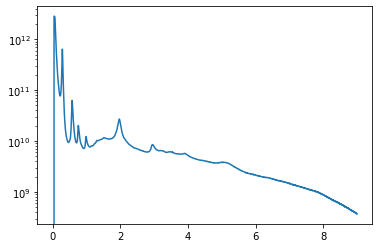

The sample is: Dinca_S4_CuHHTT_CsBr_Soaked.
The filename list for this sam=Dinca_S4_CuHHTT_CsBr_Soaked are:
 ['Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.02_y-5098.94_degwaxs00.00_1s_None_att_115204_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.01_y-5098.94_degwaxs06.50_1s_None_att_115205_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.02_y-5098.94_degwaxs13.00_1s_None_att_115206_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.02_y-5098.94_degwaxs19.50_1s_None_att_115207_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.01_y-5098.94_degwaxs26.00_1s_None_att_115208_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.0_y-5098.94_degwaxs32.50_1s_None_att_115209_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.01_y-5098.94_degwaxs39.00_1s_None_att_115210_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.01_y-5098.93_degwaxs45.50_1s_None_att_115211_sid_000001_WAXS.tif'
 'Dinca_S4_CuHHTT_CsBr_Soaked_x-24851.01_y-5098.93_degwaxs52

<Figure size 432x288 with 0 Axes>

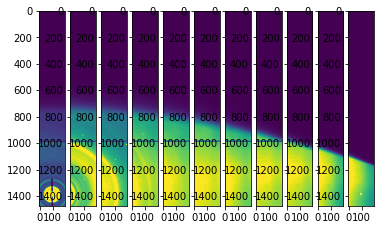

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

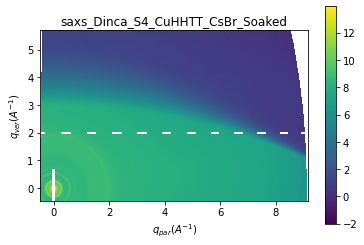

<Figure size 432x288 with 0 Axes>

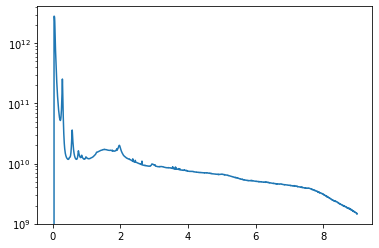

The sample is: Dinca_S5_CuHHTT_TEPBF4_Pos.
The filename list for this sam=Dinca_S5_CuHHTT_TEPBF4_Pos are:
 ['Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.7_y-4949.93_degwaxs00.00_1s_None_att_115215_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.69_y-4949.93_degwaxs06.50_1s_None_att_115216_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.69_y-4949.93_degwaxs13.00_1s_None_att_115217_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.69_y-4949.93_degwaxs19.50_1s_None_att_115218_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.69_y-4949.93_degwaxs26.00_1s_None_att_115219_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.68_y-4949.93_degwaxs32.50_1s_None_att_115220_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.69_y-4949.92_degwaxs39.00_1s_None_att_115221_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.69_y-4949.92_degwaxs45.50_1s_None_att_115222_sid_000001_WAXS.tif'
 'Dinca_S5_CuHHTT_TEPBF4_Pos_x-18450.69_y-4949.92_degwaxs52.00_1s_None

<Figure size 432x288 with 0 Axes>

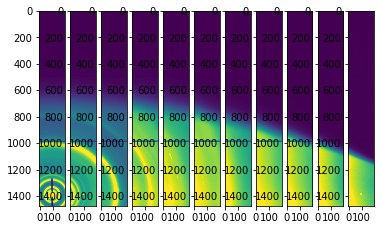

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

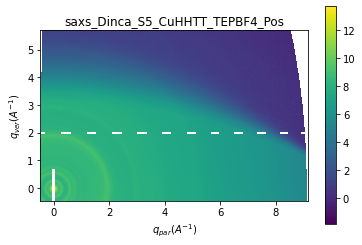

<Figure size 432x288 with 0 Axes>

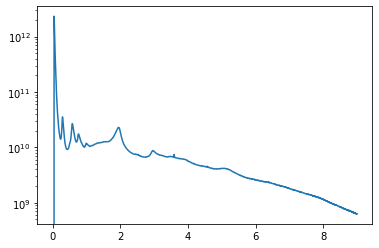

The sample is: Dinca_S6_CuHHTT_KNO2_Pos.
The filename list for this sam=Dinca_S6_CuHHTT_KNO2_Pos are:
 ['Dinca_S6_CuHHTT_KNO2_Pos_x-12000.82_y-4999.92_degwaxs00.00_1s_None_att_115226_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.81_y-4999.92_degwaxs06.50_1s_None_att_115227_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.82_y-4999.92_degwaxs13.00_1s_None_att_115228_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.83_y-4999.92_degwaxs19.50_1s_None_att_115229_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.81_y-4999.92_degwaxs26.00_1s_None_att_115230_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.81_y-4999.92_degwaxs32.50_1s_None_att_115231_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.82_y-4999.92_degwaxs39.00_1s_None_att_115232_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.82_y-4999.92_degwaxs45.50_1s_None_att_115233_sid_000001_WAXS.tif'
 'Dinca_S6_CuHHTT_KNO2_Pos_x-12000.82_y-4999.92_degwaxs52.00_1s_None_att_115234_sid_00000

<Figure size 432x288 with 0 Axes>

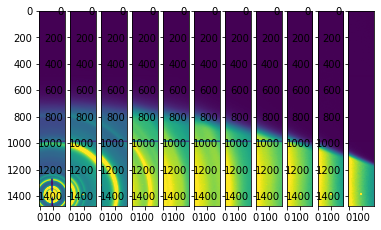

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

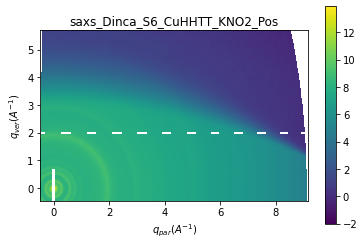

<Figure size 432x288 with 0 Axes>

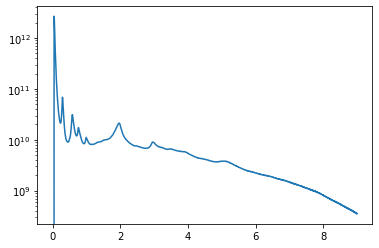

The sample is: Dinca_S7_CuHHTT_CsBr_Pos.
The filename list for this sam=Dinca_S7_CuHHTT_CsBr_Pos are:
 ['Dinca_S7_CuHHTT_CsBr_Pos_x-5750.96_y-4849.89_degwaxs00.00_1s_None_att_115237_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.95_y-4849.89_degwaxs06.50_1s_None_att_115238_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.95_y-4849.89_degwaxs13.00_1s_None_att_115239_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.94_y-4849.89_degwaxs19.50_1s_None_att_115240_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.95_y-4849.89_degwaxs26.00_1s_None_att_115241_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.96_y-4849.89_degwaxs32.50_1s_None_att_115242_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.95_y-4849.89_degwaxs39.00_1s_None_att_115243_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.95_y-4849.89_degwaxs45.50_1s_None_att_115244_sid_000001_WAXS.tif'
 'Dinca_S7_CuHHTT_CsBr_Pos_x-5750.95_y-4849.89_degwaxs52.00_1s_None_att_115245_sid_000001_WAXS.ti

<Figure size 432x288 with 0 Axes>

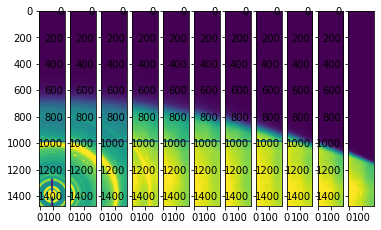

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

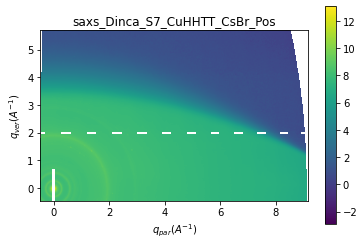

<Figure size 432x288 with 0 Axes>

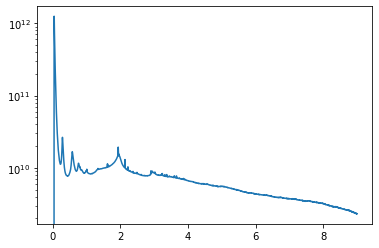

The sample is: Dinca_S8_CuHHTT_TEPBF4_Neg.
The filename list for this sam=Dinca_S8_CuHHTT_TEPBF4_Neg are:
 ['Dinca_S8_CuHHTT_TEPBF4_Neg_x648.84_y-4799.84_degwaxs00.00_1s_None_att_115248_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.84_y-4799.84_degwaxs06.50_1s_None_att_115249_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.84_y-4799.84_degwaxs13.00_1s_None_att_115250_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.84_y-4799.84_degwaxs19.50_1s_None_att_115251_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.84_y-4799.84_degwaxs26.00_1s_None_att_115252_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.84_y-4799.84_degwaxs32.50_1s_None_att_115253_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.84_y-4799.83_degwaxs39.00_1s_None_att_115254_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.85_y-4799.83_degwaxs45.50_1s_None_att_115255_sid_000001_WAXS.tif'
 'Dinca_S8_CuHHTT_TEPBF4_Neg_x648.85_y-4799.84_degwaxs52.00_1s_None_att_115256_sid_000001_WAX

<Figure size 432x288 with 0 Axes>

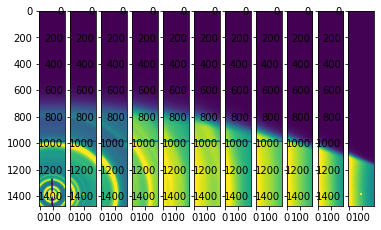

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

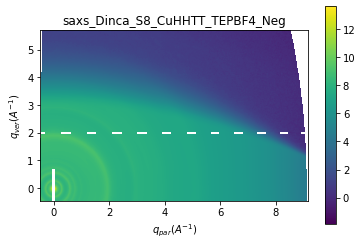

<Figure size 432x288 with 0 Axes>

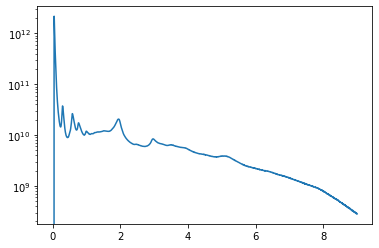

The sample is: Dinca_S9_CuHHTT_KNO2_Neg.
The filename list for this sam=Dinca_S9_CuHHTT_KNO2_Neg are:
 ['Dinca_S9_CuHHTT_KNO2_Neg_x6948.6_y-4799.89_degwaxs00.00_1s_None_att_115259_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.6_y-4799.89_degwaxs06.50_1s_None_att_115260_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.61_y-4799.89_degwaxs13.00_1s_None_att_115261_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.6_y-4799.89_degwaxs19.50_1s_None_att_115262_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.6_y-4799.89_degwaxs26.00_1s_None_att_115263_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.6_y-4799.89_degwaxs32.50_1s_None_att_115264_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.6_y-4799.9_degwaxs39.00_1s_None_att_115265_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.62_y-4799.89_degwaxs45.50_1s_None_att_115266_sid_000001_WAXS.tif'
 'Dinca_S9_CuHHTT_KNO2_Neg_x6948.61_y-4799.9_degwaxs52.00_1s_None_att_115267_sid_000001_WAXS.tif'
 'Dinca_S9_CuH

<Figure size 432x288 with 0 Axes>

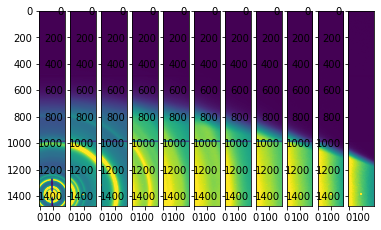

/home/yuzhang/Software/pyScatt/pyScatt/saxs.py:30: RuntimeWarning: divide by zero encountered in log
  if H==1 and V==1:


<Figure size 432x288 with 0 Axes>

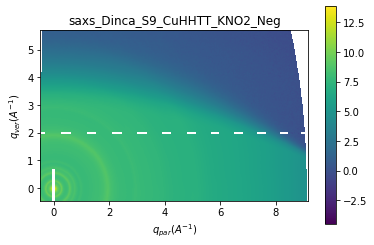

<Figure size 432x288 with 0 Axes>

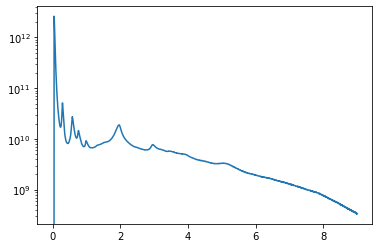

Done


<Figure size 432x288 with 0 Axes>

In [20]:
for sam in ks[:]:  
#for sam in ks[2:3]:     
    dat = ssam_dict[sam]
    print( 'The sample is: %s.'%sam)
    print('The filename list for this sam=%s are:\n %s.'%(sam, dat )) 

    SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                         detector = detector_waxs,
                                         sdd = sdd_waxs,
                                         wav = wav,
                                         alphai = incident_angle,
                                         center = center_waxs,
                                         bs_pos = bs_pos_waxs,
                                         det_ini_angle = det_ini_angle,
                                         det_angle_step = det_angle_step,
                                         bs_kind = bs_kind)

    SMI_waxs.open_data( inDir, dat)
    if show_raw:
        plt.figure()
        for i, (img, mask) in enumerate(zip(SMI_waxs.imgs, SMI_waxs.masks)):
            plt.subplot(1, len(SMI_waxs.imgs), i+1)
            plt.imshow(img, vmin = 0, vmax = np.percentile(img, 97))
        plt.show()
        plt.savefig( outDir + sam +'_raw_waxs.png')
        
    SMI_waxs.stitching_data()

    plt.figure()
    plt.imshow(np.log(SMI_waxs.img_st), #vmin=.01,vmax=10,
               extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]])    
    plt.title('saxs_%s'%sam)
    plt.xlabel('$q_{par}(A^{-1})$')
    plt.ylabel('$q_{ver}(A^{-1})$')
    plt.colorbar()
    plt.show()
    plt.savefig( outDir + sam +'_q_map_waxs.png')

    if make_cake:
        SMI_waxs.caking()
        plt.figure()
        plt.imshow(np.log(SMI_waxs.cake)[::-1], origin = 'lower',
                   extent=[SMI_waxs.q_cake[0], SMI_waxs.q_cake[-1], SMI_waxs.chi_cake[0], SMI_waxs.chi_cake[-1]],
                   aspect = abs(SMI_waxs.q_cake[0] - SMI_waxs.q_cake[-1])/abs(SMI_waxs.chi_cake[0]- SMI_waxs.chi_cake[-1])
                  )    
        plt.title('saxs_%s'%sam)
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$angle\ (deg) $')
        plt.colorbar()
        plt.show()
        plt.savefig( outDir + sam +'_cake_waxs.png')



    SMI_waxs.radial_averaging(radial_range = [0, 9], azimuth_range=[0, 90], npt = 5000)
    q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad
    tth = np.rad2deg(2*np.arcsin(1E10 * SMI_waxs.q_rad*wav/(4*np.pi)))           
    plt.figure()
    plt.plot(SMI_waxs.q_rad, SMI_waxs.I_rad)
    plt.yscale('log')
    plt.show()
    plt.savefig( outDir + sam +'_q_Iq_waxs.png')

    if flag_save:
        #Save the stitched image as a tiff
        fabio.tifimage.TifImage(
              np.nan_to_num(SMI_waxs.img_st).astype(np.float64)).write(os.path.join(outDir,
              'q_map_data_%s_waxs.tiff'%sam)) 
        #Save the qx and qy as an 1D array
        np.savetxt(os.path.join(outDir, 'qpar_%s_waxs.txt'%sam), np.linspace(SMI_waxs.qp[0],
                                SMI_waxs.qp[-1], np.shape(SMI_waxs.img_st)[1]))
        np.savetxt(os.path.join(outDir, 'qver_%s_waxs.txt'%sam), np.linspace(SMI_waxs.qz[0],
                                SMI_waxs.qz[-1], np.shape(SMI_waxs.img_st)[0])) 

        if make_cake:
            np.savetxt(os.path.join(outDir, 'qpolar_map_%s_waxs.txt'%sam), 
                       np.linspace(SMI_waxs.q_cake[0], SMI_waxs.q_cake[-1], 
                       np.shape(SMI_waxs.cake)[1]))
            np.savetxt(os.path.join(outDir, 'chipolar_map_%s_waxs.txt'%sam), 
                       np.linspace(SMI_waxs.chi_cake[0], SMI_waxs.chi_cake[-1],
                       np.shape(SMI_waxs.cake)[0])) 
            fabio.tifimage.TifImage(
                       np.nan_to_num(SMI_waxs.cake).astype(np.float64)).write(os.path.join(
                            outDir, 'TIFF/polar_map_%s_waxs.tiff'%sam)) 
          #Save the sum image as a tiff
        np.savetxt(os.path.join( outDir, 'Radint_%s_waxs.txt'%sam), 
                   np.vstack((SMI_waxs.q_rad, SMI_waxs.I_rad)).T)

        if True:                      
            res = {}
            if False:
                k = 'raw'
                res[k]={}
                res[k]['data'] = np.nan_to_num(img).astype('int')
                res[k]['label'] = 'raw data'

            k = 'qmap'
            res[k]={}
            res[k]['data'] =  np.nan_to_num(SMI_waxs.img_st).astype(np.float64)[::-1]
            res[k]['label'] = 'qmap'
            res[k]['qpar'] =  np.linspace(SMI_waxs.qp[0], SMI_waxs.qp[-1], np.shape(SMI_waxs.img_st)[1])
            res[k]['qver'] =  np.linspace(SMI_waxs.qz[0], SMI_waxs.qz[-1], np.shape(SMI_waxs.img_st)[0])            

            if make_cake:
                k = 'qpolar'
                res[k]={}
                res[k]['data'] =  np.nan_to_num(SMI_waxs.cake).astype(np.float64)[::-1]
                res[k]['label'] = 'qpolar'           
                q_polar =  np.linspace(SMI_waxs.q_cake[0], SMI_waxs.q_cake[-1], np.shape(SMI_waxs.cake)[1])
                ang_polar = np.linspace( SMI_waxs.chi_cake[0], SMI_waxs.chi_cake[-1], np.shape(SMI_waxs.cake)[0]) 
                res[k]['q_polar'] = q_polar
                res[k]['ang_polar'] = ang_polar                

            k= 'circular average'
            res[k]={}
            res[k]['data'] =  np.vstack((SMI_waxs.q_rad, tth, SMI_waxs.I_rad)).T
            res[k]['label'] = [ 'q', 'angle', 'Iq' ]  
            dicttoh5( res, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/WAXS/', mode='a', overwrite_data=True)

print('Done')

In [19]:
if False:
    test_res = h5todict( os.path.join(outDir_HDF, '%s.h5'%sam) )
    test_res.keys()
    test_res['qmap']

In [22]:
import pyScatt

In [23]:
pyScatt

<module 'pyScatt' from '/home/group/Software/pyScatt/pyScatt/__init__.py'>